In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#調色板風格，其顏色較柔和
sns.set_palette('pastel')

#圖表背景的風格，灰階有格線
# sns.set_style('whitegrid')
sns.set_style('darkgrid')


In [5]:
# 讀取檔案與欄位(Windows)
# df1 = pd.read_csv('airplane_info.csv', usecols=['aircraft_type','n_number'])
# df2 = pd.read_csv('flight_info.csv', usecols=['delay_total_time','tail_num'])

# (Fedora)
df1 = pd.read_csv('airplane_info.csv', usecols=['aircraft_type','n_number'], encoding='utf-8')
df2 = pd.read_csv('flight_info.csv', usecols=['delay_total_time','tail_num'], encoding='utf-8')

print(df1.head(5))
print(df2.head(5))

/tmp/ipykernel_10840/3838203659.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('flight_info.csv', usecols=['delay_total_time','tail_num'], encoding='utf-8')


  n_number aircraft_type
0    10008             4
1    1000M             4
2    10016             5
3    10017             4
4    1001N             6
  tail_num  delay_total_time
0    991AT              26.0
1    986AT             -17.0
2    965AT               0.0
3    921AT             -10.0
4    940AT             -20.0


In [4]:
df1

,n_number,aircraft_type
0,10008,4
1,1000M,4
2,10016,5
3,10017,4
4,1001N,6
...,...,...
349919,9ZS,1
349920,9ZT,4
349921,9ZU,4
349922,9ZV,6


In [3]:
df2

,tail_num,delay_total_time
0,991AT,26.0
1,986AT,-17.0
2,965AT,0.0
3,921AT,-10.0
4,940AT,-20.0
...,...,...
35755096,329MS,-7.0
35755097,950LR,14.0
35755098,329MS,-10.0
35755099,249LR,9.0


In [6]:
# 合併兩個資料集 df1 和 df2 的，並且使用 pd.merge()函式
total_delay_counts =pd.merge(
    df1,
    df2,
    left_on= 'n_number',
    right_on='tail_num',
    how= 'left',
    # 這裡是把 n_number 和 tail_num 欄位合併，合併方式left，是以左邊的 df1 為主要資料集，並在 df2 中找到與之對應的資料行。
)
total_delay_counts


,n_number,aircraft_type,tail_num,delay_total_time
0,10008,4,NaN,NaN
1,1000M,4,NaN,NaN
2,10016,5,NaN,NaN
3,10017,4,NaN,NaN
4,1001N,6,NaN,NaN
...,...,...,...,...
35218917,9ZS,1,NaN,NaN
35218918,9ZT,4,NaN,NaN
35218919,9ZU,4,NaN,NaN
35218920,9ZV,6,NaN,NaN


In [7]:
# 去除Na值
tdc = total_delay_counts.dropna()

tdc_isna = total_delay_counts.isna().sum()
tdc

,n_number,aircraft_type,tail_num,delay_total_time
200,105UA,5,105UA,142.0
201,105UA,5,105UA,62.0
395,110AA,4,110AA,23.0
396,110AA,4,110AA,-13.0
397,110AA,4,110AA,-19.0
...,...,...,...,...
35218024,999JQ,5,999JQ,-19.0
35218025,999JQ,5,999JQ,-7.0
35218026,999JQ,5,999JQ,-24.0
35218027,999JQ,5,999JQ,-13.0


In [8]:
# 去除 tail_num 欄位
tdc = tdc.drop(columns=['tail_num'])
tdc

,n_number,aircraft_type,delay_total_time
200,105UA,5,142.0
201,105UA,5,62.0
395,110AA,4,23.0
396,110AA,4,-13.0
397,110AA,4,-19.0
...,...,...,...
35218024,999JQ,5,-19.0
35218025,999JQ,5,-7.0
35218026,999JQ,5,-24.0
35218027,999JQ,5,-13.0


In [9]:
# 將tdc DataFrame對象按'n_number'列進行分組，將相同的'n_number'值所對應的行放在同一組中，然後對每組的'delay_total_time'列執行求平均值的操作。
grouped = tdc.groupby('n_number').mean()
grouped

,aircraft_type,delay_total_time
n_number,,
101DQ,inf,-4.431232
101DU,inf,7.885714
101HQ,inf,-2.541704
101NN,inf,-10.963010
102AA,inf,1.606343
...,...,...
998JE,inf,5.511487
998NN,inf,-2.292471
999DN,inf,-2.069303


In [10]:
# reset_index() 方法可以用來將原本的 index 變成一個新的 column。若不想要丟失原本的 index，可以加上 drop=False 參數。
# grouped.reset_index(drop=False) 的作用是將 grouped DataFrame 的 index 重新設定，並將原本的 index 變成一個新的 n_number 欄位。
grouped = grouped.reset_index(drop=False)
grouped

,n_number,aircraft_type,delay_total_time
0,101DQ,inf,-4.431232
1,101DU,inf,7.885714
2,101HQ,inf,-2.541704
3,101NN,inf,-10.963010
4,102AA,inf,1.606343
...,...,...,...
7297,998JE,inf,5.511487
7298,998NN,inf,-2.292471
7299,999DN,inf,-2.069303
7300,999FR,2083333333333333351303387021312.0,51.843750


In [11]:
# 由大到小排列，並且取前50筆資料，且資料均大於零
grouped = grouped.sort_values(by='delay_total_time', ascending=False)
grouped = grouped.iloc[:50]
grouped = grouped.loc[grouped['delay_total_time'] > 0]
grouped

,n_number,aircraft_type,delay_total_time
3889,654DL,5.0,589.000000
4093,684RW,4.0,503.000000
1661,3115J,5.0,459.000000
632,182UA,27.5,361.500000
596,178UA,5.0,286.000000
176,121UA,27.5,247.500000
2845,47284,27.5,176.000000
5983,881BK,11111.0,163.000000
2201,37545,5.0,128.000000
5946,8794Q,27.5,122.500000


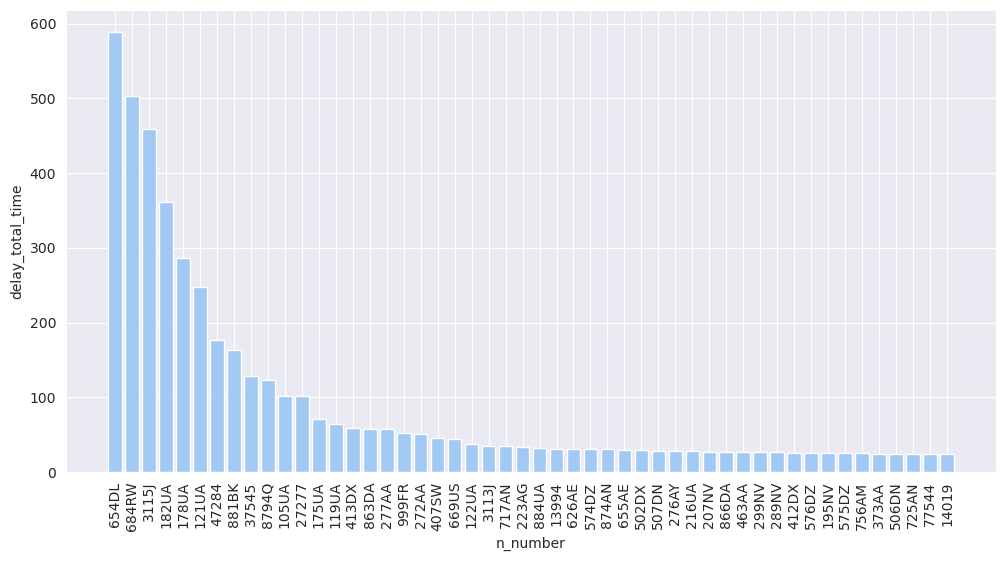

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(grouped['n_number'], grouped['delay_total_time'])
plt.xticks(rotation=90)
plt.xlabel('n_number')
plt.ylabel('delay_total_time')
plt.show()


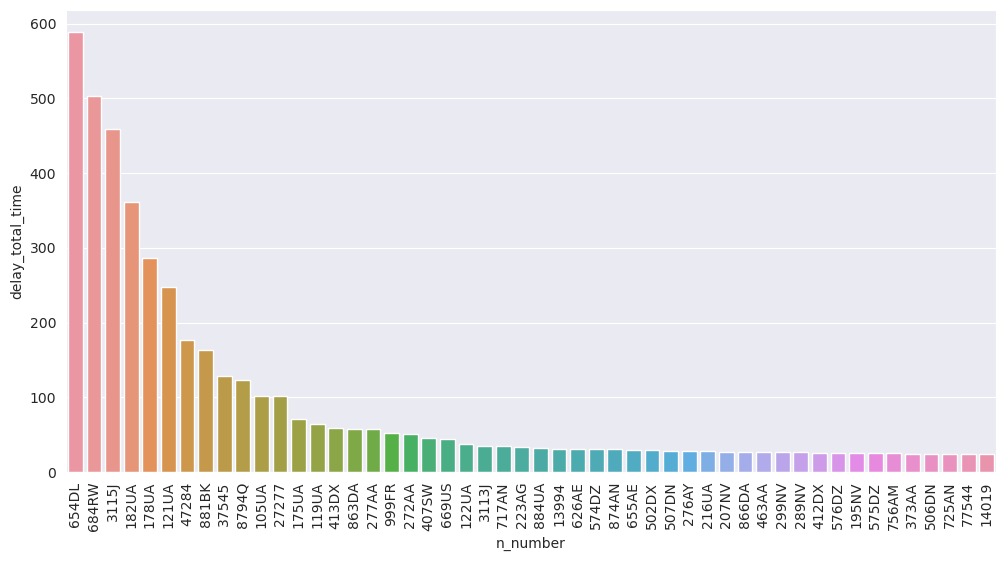

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="n_number", y="delay_total_time")
plt.xticks(rotation=90)
plt.xlabel('n_number')
plt.ylabel('delay_total_time')
plt.show()
